In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression, Lasso
from sklearn.metrics import accuracy_score,classification, confusion_matrix,classification_report,precision_score,roc_curve, recall_score, roc_auc_score 
import eli5
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)
from IPython.display import Image
import scipy
from scipy.stats import norm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tqdm import tqdm_notebook
from sklearn.pipeline import Pipeline # import Pipelin
# from sklearn import cr

/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/helga/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_select

In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [3]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Data

In [4]:
train_prepared = pd.read_csv('data/TRAIN_PREPARED.csv')
train_raw = pd.read_csv('data/TRAIN_RAW_DATA.csv')
train_additional_data = pd.read_csv('data/TRAIN_ADDITIONAL_DATA.csv')

In [5]:
test_prepared = pd.read_csv('data/TEST_PREPARED.csv')
test_raw = pd.read_csv('data/TEST_RAW_DATA.csv')
test_additional_data = pd.read_csv('data/TEST_ADDITIONAL_DATA.csv')

In [6]:
train_prepared.head()

,cut_date,days_to_end,email,first_date,last_date,num_country_max_1days,num_city_max_1days,android_max_1days,smarttv_max_1days,iphone_max_1days,ipad_max_1days,apple_max_1days,pc_max_1days,time_spent_sum_3days,time_spent_max_3days,num_title_ep_sum_3days,num_title_ep_max_3days,num_title_ru_sum_3days,num_title_ru_max_3days,num_country_max_3days,num_city_max_3days,other_content_sum_3days,top_1_sum_3days,top_2_sum_3days,top_3_sum_3days,top_4_sum_3days,top_5_sum_3days,top_6_sum_3days,top_7_sum_3days,top_8_sum_3days,top_9_sum_3days,top_10_sum_3days,android_max_3days,smarttv_max_3days,iphone_max_3days,ipad_max_3days,apple_max_3days,pc_max_3days,time_spent_sum_7days,time_spent_max_7days,num_title_ep_sum_7days,num_title_ep_max_7days,num_title_ru_sum_7days,num_title_ru_max_7days,num_country_max_7days,num_city_max_7days,other_content_sum_7days,top_1_sum_7days,top_2_sum_7days,top_3_sum_7days,top_4_sum_7days,top_5_sum_7days,top_6_sum_7days,top_7_sum_7days,top_8_sum_7days,top_9_sum_7days,top_10_sum_7days,android_max_7days,smarttv_max_7days,iphone_max_7days,ipad_max_7days,apple_max_7days,pc_max_7days,time_spent_sum_14days,time_spent_max_14days,num_title_ep_sum_14days,num_title_ep_max_14days,num_title_ru_sum_14days,num_title_ru_max_14days,num_country_max_14days,num_city_max_14days,other_content_sum_14days,top_1_sum_14days,top_2_sum_14days,top_3_sum_14days,top_4_sum_14days,top_5_sum_14days,top_6_sum_14days,top_7_sum_14days,top_8_sum_14days,top_9_sum_14days,top_10_sum_14days,android_max_14days,smarttv_max_14days,iphone_max_14days,ipad_max_14days,apple_max_14days,pc_max_14days,time_spent_sum_21days,time_spent_max_21days,num_title_ep_sum_21days,num_title_ep_max_21days,num_title_ru_sum_21days,num_title_ru_max_21days,num_country_max_21days,num_city_max_21days,other_content_sum_21days,top_1_sum_21days,top_2_sum_21days,top_3_sum_21days,top_4_sum_21days,top_5_sum_21days,top_6_sum_21days,top_7_sum_21days,top_8_sum_21days,top_9_sum_21days,top_10_sum_21days,android_max_21days,smarttv_max_21days,iphone_max_21days,ipad_max_21days,apple_max_21days,pc_max_21days,time_spent_sum_30days,time_spent_max_30days,num_title_ep_sum_30days,num_title_ep_max_30days,num_title_ru_sum_30days,num_title_ru_max_30days,num_country_max_30days,num_city_max_30days,other_content_sum_30days,top_1_sum_30days,top_2_sum_30days,top_3_sum_30days,top_4_sum_30days,top_5_sum_30days,top_6_sum_30days,top_7_sum_30days,top_8_sum_30days,top_9_sum_30days,top_10_sum_30days,android_max_30days,smarttv_max_30days,iphone_max_30days,ipad_max_30days,apple_max_30days,pc_max_30days,activity_1to3,activity_1to7,activity_1to14,activity_7to14,activity_7to21,activity_7to30,activity_14to30,label
0,2019-04-02 00:00:00,11,8ba752f2c5,2019-02-10 00:00:00,2019-03-13 09:36:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4367.0,4367.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,59073.0,25595.0,10.0,4.0,10.0,4.0,1.0,20.0,6.0,17.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,2019-04-02 00:00:00,10,752a6d96f7,2018-10-28 00:00:00,2019-04-01 20:51:29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10332.0,10152.0,12.0,9.0,5.0,2.0,1.0,11.0,0.0,0.0,1.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,10392.0,10152.0,13.0,9.0,6.0,2.0,1.0,11.0,0.0,0.0,2.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,19801.0,10152.0,22.0,9.0,10.0,3.0,1.0,11.0,1.0,2.0,10.0,9.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,4.0,0.0,0.0,0.0,0.00

In [7]:
train_prepared.shape

(180249, 146)

In [8]:
train_prepared.email.nunique()

20000

In [9]:
train_prepared.groupby('email').size().sort_values(ascending=False)[:5]

email
44fdbef6e9    15
2ca629737e    15
0fef4eb7c8    15
8a6867cab5    15
8a8a7e85db    15
dtype: int64

Some email repeat have more examples.

In [77]:
# train_new = pd.DataFrame(columns=cols)
# for ind, i in tqdm_notebook(enumerate(train_prepared.email.unique())):
#     train_new = pd.concat([train_new ,train_prepared[train_prepared.email==i].groupby('email'
#         )[cols].median()])

In [10]:
# def get_dif_date(str_date1, str_date2, f='days', form='%Y-%m-%d %H:%M:%S'):
#     dif = datetime.datetime.strptime(str_date1, form) - datetime.datetime.strptime(str_date2, form)
#     return dif.f

In [6]:
train_prepared.cut_date = pd.to_datetime(train_prepared.cut_date)
train_prepared.first_date = pd.to_datetime(train_prepared.first_date)
train_prepared.last_date = pd.to_datetime(train_prepared.last_date)

In [7]:
train_prepared['dif_l_f_day'] = (train_prepared.last_date - train_prepared.first_date).apply(lambda x: x.days)
train_prepared['dif_c_f_day'] = (train_prepared.cut_date - train_prepared.first_date).apply(lambda x: x.days)
train_prepared['dif_l_c_day'] = (train_prepared.cut_date - train_prepared.last_date).apply(lambda x: x.days)

In [8]:
group_email_last = train_prepared.sort_values(by='cut_date').reset_index(drop=True).groupby(
    ['email']).groups#['cut_date'].max().groupsby=''

In [9]:
last_record_by_email = {k:max(v) for k, v in group_email_last.items()}

I guess that last column about each email contains enough data to make base prediction.

In [115]:
train_new = train_prepared.loc[list(last_record_by_email.values())].head()

,cut_date,days_to_end,email,first_date,last_date,num_country_max_1days,num_city_max_1days,android_max_1days,smarttv_max_1days,iphone_max_1days,ipad_max_1days,apple_max_1days,pc_max_1days,time_spent_sum_3days,time_spent_max_3days,num_title_ep_sum_3days,num_title_ep_max_3days,num_title_ru_sum_3days,num_title_ru_max_3days,num_country_max_3days,num_city_max_3days,other_content_sum_3days,top_1_sum_3days,top_2_sum_3days,top_3_sum_3days,top_4_sum_3days,top_5_sum_3days,top_6_sum_3days,top_7_sum_3days,top_8_sum_3days,top_9_sum_3days,top_10_sum_3days,android_max_3days,smarttv_max_3days,iphone_max_3days,ipad_max_3days,apple_max_3days,pc_max_3days,time_spent_sum_7days,time_spent_max_7days,num_title_ep_sum_7days,num_title_ep_max_7days,num_title_ru_sum_7days,num_title_ru_max_7days,num_country_max_7days,num_city_max_7days,other_content_sum_7days,top_1_sum_7days,top_2_sum_7days,top_3_sum_7days,top_4_sum_7days,top_5_sum_7days,top_6_sum_7days,top_7_sum_7days,top_8_sum_7days,top_9_sum_7days,top_10_sum_7days,android_max_7days,smarttv_max_7days,iphone_max_7days,ipad_max_7days,apple_max_7days,pc_max_7days,time_spent_sum_14days,time_spent_max_14days,num_title_ep_sum_14days,num_title_ep_max_14days,num_title_ru_sum_14days,num_title_ru_max_14days,num_country_max_14days,num_city_max_14days,other_content_sum_14days,top_1_sum_14days,top_2_sum_14days,top_3_sum_14days,top_4_sum_14days,top_5_sum_14days,top_6_sum_14days,top_7_sum_14days,top_8_sum_14days,top_9_sum_14days,top_10_sum_14days,android_max_14days,smarttv_max_14days,iphone_max_14days,ipad_max_14days,apple_max_14days,pc_max_14days,time_spent_sum_21days,time_spent_max_21days,num_title_ep_sum_21days,num_title_ep_max_21days,num_title_ru_sum_21days,num_title_ru_max_21days,num_country_max_21days,num_city_max_21days,other_content_sum_21days,top_1_sum_21days,top_2_sum_21days,top_3_sum_21days,top_4_sum_21days,top_5_sum_21days,top_6_sum_21days,top_7_sum_21days,top_8_sum_21days,top_9_sum_21days,top_10_sum_21days,android_max_21days,smarttv_max_21days,iphone_max_21days,ipad_max_21days,apple_max_21days,pc_max_21days,time_spent_sum_30days,time_spent_max_30days,num_title_ep_sum_30days,num_title_ep_max_30days,num_title_ru_sum_30days,num_title_ru_max_30days,num_country_max_30days,num_city_max_30days,other_content_sum_30days,top_1_sum_30days,top_2_sum_30days,top_3_sum_30days,top_4_sum_30days,top_5_sum_30days,top_6_sum_30days,top_7_sum_30days,top_8_sum_30days,top_9_sum_30days,top_10_sum_30days,android_max_30days,smarttv_max_30days,iphone_max_30days,ipad_max_30days,apple_max_30days,pc_max_30days,activity_1to3,activity_1to7,activity_1to14,activity_7to14,activity_7to21,activity_7to30,activity_14to30,label,dif_l_f_day,dif_c_f_day,dif_l_c_day
105393,2019-03-31,13,26b79e030d,2018-11-28,2019-03-31 14:41:30,1.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,82754.0,43592.0,8.0,6.0,5.0,3.0,1.0,20.0,1.0,34.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,85722.0,43592.0,12.0,6.0,8.0,3.0,1.0,20.0,1.0,37.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,0.0,114957.0,43592.0,23.0,6.0,15.0,3.0,1.0,20.0,1.0,44.0,0.0,6.0,9.0,0.0,3.0,0.0,2.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,0.0,154792.0,43592.0,42.0,11.0,21.0,3.0,1.0,20.0,4.0,44.0,0.0,21.0,12.0,0.0,3.0,0.0,7.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,0.0,154792.0,43592.0,42.0,11.0,21.0,3.0,1.0,20.0,4.0,44.0,0.0,21.0,12.0,0.0,3.0,0.0,7.0,0.0,0.0,4.0,20.0,0.0,0.0,0.0,0.0,0.037062,0.035778,0.026680,0.745687,0.553788,0.553788,0.742655,1.0,123,123,-1
145075,2019-04-04,13,9830bc6a6e,2019-02-14,2019-03-26 22:03:23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11773.0,5823.0,3.0,1.0,3.0,1.0,1.0,7.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,11773.0,5823.0,3.0,1.0,3.0,1.0,1.0,7.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,35461.0,10031.0,7.0,1.0,7.0,1.0,1.0,7.0,0.0,25.0,0.0

In [11]:
train_new.shape, train_prepared.email.nunique()

((20000, 149), 20000)

In [12]:
le = LabelEncoder()
email_transform = le.fit_transform(train_new.email)

In [13]:
train_new.email = email_transform

In [8]:
# email_df = pd.get_dummies(train_prepared.email.values)

In [10]:
# overfit
# map_email = dict(train_prepared.email.value_counts())
# d_period_l_f = dict((train_prepared.groupby('email').last_date.max()-train_prepared.groupby('email'
#                                                                     ).first_date.min()).apply(lambda x: x.days))

In [9]:
# train_prepared['email_count'] = train_prepared.email.map(map_email)
# train_prepared['period_l_f'] = train_prepared.email.map(d_period_l_f)
# train_prepared['last_date_max'] = train_prepared.email.map(map_email)

In [14]:
# cols = [i for i in train_prepared.columns if 'date' not in i and i!= 'email']
cols = [i for i in train_prepared.columns if 'date' not in i]

In [15]:
# train = train_prepared[cols]
train = train_new[cols]

### Analysis

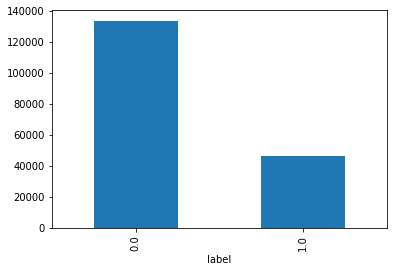

In [23]:
train.groupby('label').size().plot(kind='bar')

In the training dataset for each class label is not balanced

In [26]:
y_True = train[(train.label == 1)]
print ("Churn Percentage = "+str( (y_True.shape[0] / train["label"].shape[0]) * 100 ))

Churn Percentage = 25.909158996721203


In [22]:
corr_label = train_prepared[cols].corr()['label']
corr_label.sort_values()[:10]

num_country_max_7days     -0.194676
num_title_ru_max_7days    -0.176016
num_country_max_14days    -0.171498
num_title_ru_sum_7days    -0.171414
num_country_max_3days     -0.170723
num_title_ru_sum_14days   -0.170422
num_title_ru_max_14days   -0.166872
num_title_ru_max_3days    -0.155283
num_title_ru_sum_3days    -0.154305
num_title_ep_sum_14days   -0.154157
Name: label, dtype: float64

In [63]:
train_prepared[train_prepared.email == train_prepared.email.value_counts().sort_values().keys(
    )[-5]].label.value_counts()

0.0    15
Name: label, dtype: int64

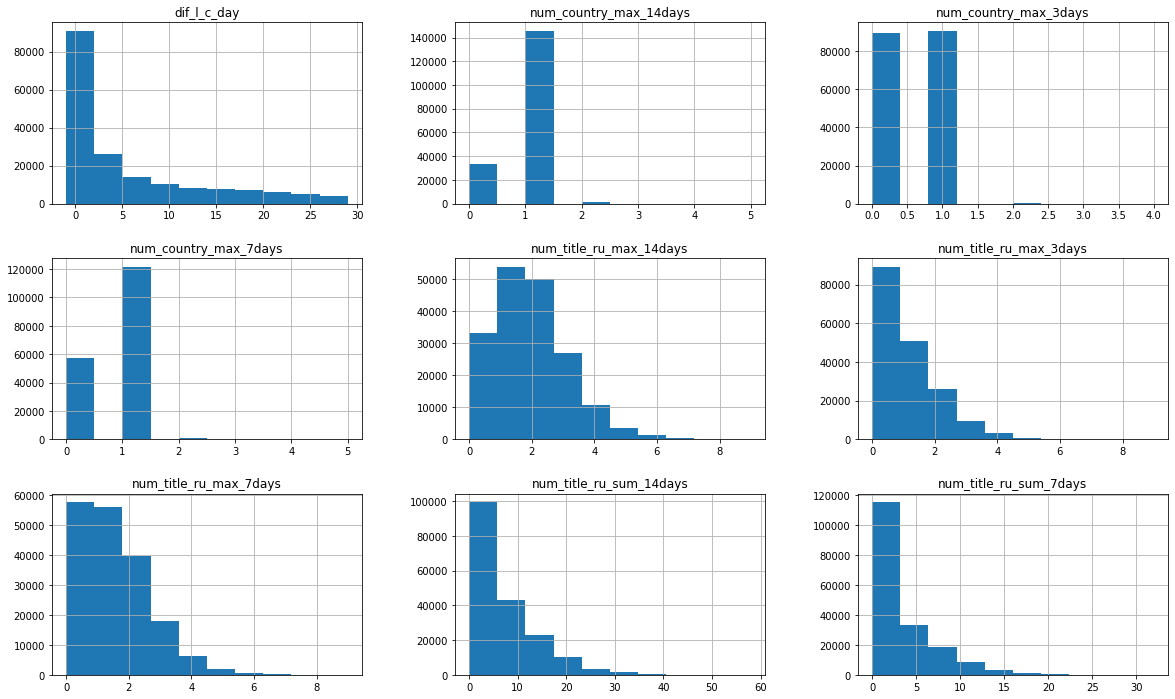

In [42]:
train_prepared[list(corr_label.sort_values()[:8].keys()) + ['dif_l_c_day']].hist(figsize=(20,12));

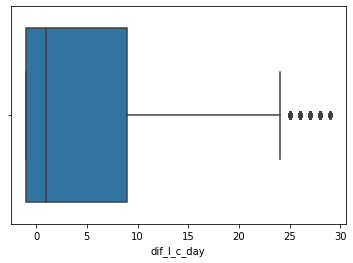

In [43]:
sns.boxplot(train.dif_l_c_day)

Most of features have lognormal distribution (we can get the log function on it in future).

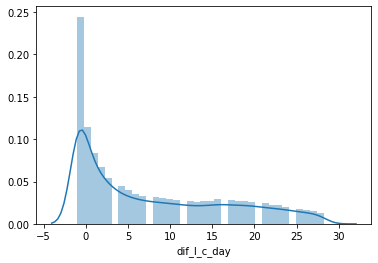

In [50]:
sns.distplot(train[train['label'] == 1]['dif_l_c_day'])

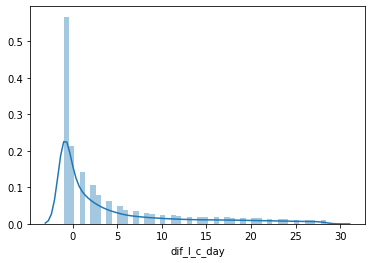

In [51]:
sns.distplot(train[train['label'] == 0]['dif_l_c_day'])

In [53]:
pd.crosstab(train['label'], train['num_country_max_14days'], margins=True)

num_country_max_14days,0.0,1.0,2.0,3.0,4.0,5.0,All
label,,,,,,,
0.0,19351,112916,1231,37,5,8,133548
1.0,13946,32513,233,9,0,0,46701
All,33297,145429,1464,46,5,8,180249


## Models

In [16]:
y = train['label']
X = train.drop(columns=['label'])

In [58]:
# Spot Check Algorithms
models = []
models.append(('LC', LogisticRegression()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GB' ,GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

In [97]:
def my_cv(data,target,model,score='roc_auc'):
    """
    Method of cross-validation with scaling features
    Parameters
    ----------
    data : pd.DataFrame
        Training set
    target : pd.Series
        Target variable **dep_var**

    Returns
    -------
    score : double
            mean of roc_auc scores on cross-validation
    """
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    cv_result = []
    for train_ind, val_ind in tqdm_notebook(cv.split(data, target)):
        X_train_ = data.iloc[train_ind]
        y_train_ = target.iloc[train_ind]
        X_val_ = data.iloc[val_ind]
        y_val_ = target.iloc[val_ind]
        model.fit(X_train_,y_train_)
        y_pred_ = model.predict(X_val_)
        if score == 'roc_auc':
            res = roc_auc_score(y_val_,y_pred_)
        elif score == 'accuracy':
            res = accuracy_score(y_val_,y_pred_)
        elif score == 'precision':
            res = precision_score(y_val_,y_pred_)
        elif score == 'recall':
            res = recall_score(y_val_,y_pred_)
        cv_result.append(res)
    return np.mean(cv_result)

In [56]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=17)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s roc_auc score:%f" % (name, cv_results.mean())
    print(msg)

LC roc_auc score:0.653028
AdaBoostClassifier roc_auc score:0.684559
KNN roc_auc score:0.624956
CART roc_auc score:0.633336
RandomForest roc_auc score:0.720766
GB roc_auc score:0.701630
LGBM roc_auc score:0.742971
XGB roc_auc score:0.702014


In general roc-auc is matric with describe all features of error but we should pay more attention to getection class 1 and evoiding FN errors.

In [36]:
def make_pred(X,y,model,proba=False):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    if proba:
        y_prob = model.predict_proba(X_test)[::,1]
        return y_test, y_pred, y_prob
    return y_test, y_pred

In [109]:
def plot_conf_matrix(X,y,model,title, print_score=False):
    y_test, y_pred = make_pred(X,y,model)
    plt.figure()
    grad_ens_conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='')
    if print_score:
        print('LogReg',':\n {}\n'.format(classification_report(y_test, y_pred)))
    plt.title(title)

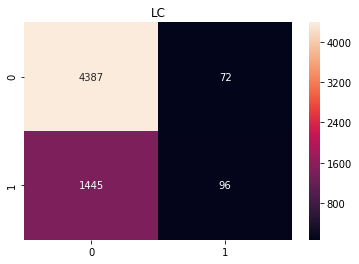

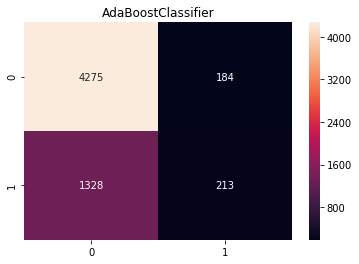

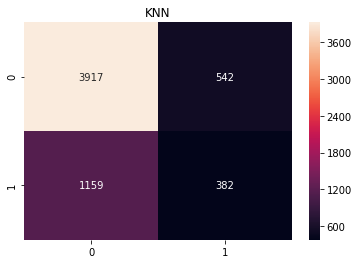

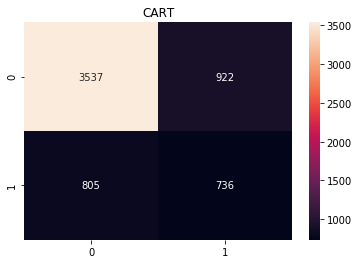

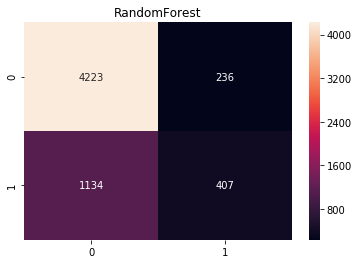

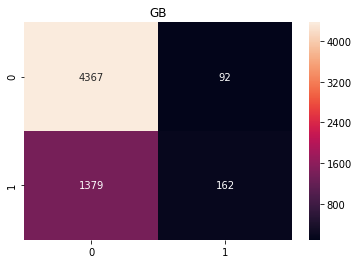

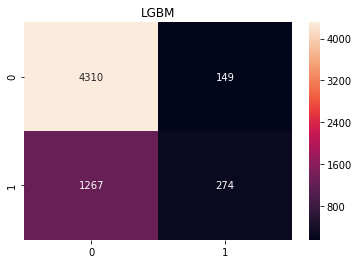

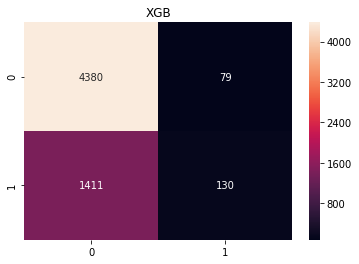

In [59]:
for name, model in tqdm_notebook(models):
    plot_conf_matrix(X,y,model,name)

If make some LogReg modification it can work better.

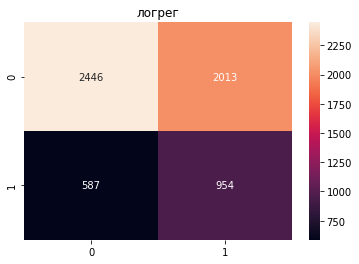

In [63]:
plot_conf_matrix(X,y,LogisticRegression(class_weight='balanced'),'логрег')

Couse a lot feats have lognormal distribution apply log function to df

In [17]:
y = train['label']
X = train.drop(columns=['label'])
log_X = np.log10(X)
log_X = log_X.replace([np.inf, -np.inf], np.nan).fillna(0)

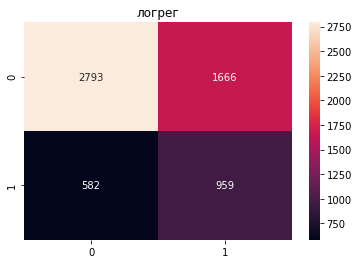

In [97]:
plot_conf_matrix(log_X,y,LogisticRegression(class_weight='balanced'),'логрег')

In [94]:
y_true_, y_pred_ = make_pred(X,y,LogisticRegression(class_weight='balanced'))
print('LogReg',':\n {}\n'.format(classification_report(y_true_, y_pred_)))

LogReg :
               precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      4459
         1.0       0.32      0.62      0.42      1541

    accuracy                           0.57      6000
   macro avg       0.56      0.58      0.54      6000
weighted avg       0.68      0.57      0.59      6000




Recall attempts to answer the following question: What proportion of actual positives was identified correctly? (in heatmap chart is FN and I user 'balansed' parameter in LogLoss to correct this). We should maximase this metric because recall measures the percentage of actual customers who may stop using the service that were correctly classified.

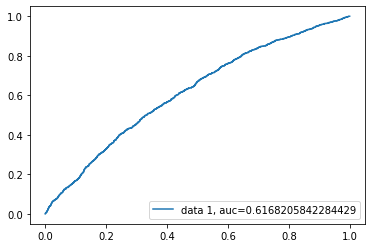

In [107]:
y_true_, y_pred_, y_prob_ = make_pred(X,y,LogisticRegression(class_weight='balanced'),proba=True)
fpr, tpr, _ = roc_curve(y_test,  y_prob_)
auc = roc_auc_score(y_test, y_prob_)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Hyperparameter optimization

In [47]:
pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.
X_train, X_test, y_train, y_test = train_test_split(log_X,y,test_size=0.3,random_state=17)
param_grid = [
    {'classifier' : [LogisticRegression(class_weight='balanced')],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='recall')

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.5min finished


In [50]:
res3 = (
    pd.DataFrame({
        "mean_test_score": best_clf.cv_results_["mean_test_score"],
        "mean_fit_time": best_clf.cv_results_["mean_fit_time"]})
      .join(pd.io.json.json_normalize(best_clf.cv_results_["params"]).add_prefix("param_"))
)

Unlogged feats with simple cv score

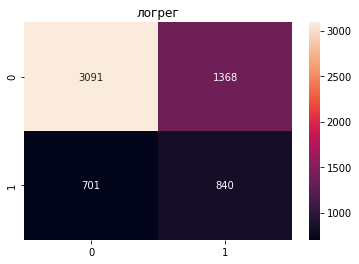

In [38]:
plot_conf_matrix(log_X,y,best_clf.best_params_['classifier'],'логрег')

Logges feats with recall score

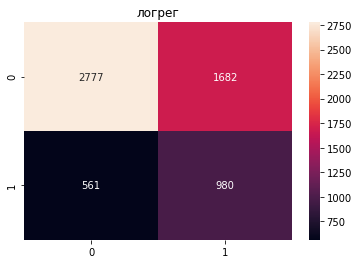

In [48]:
plot_conf_matrix(log_X,y,best_clf.best_params_['classifier'],'логрег')

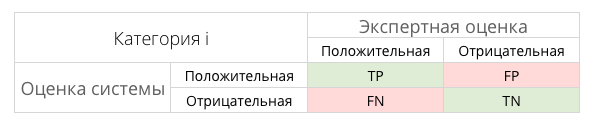

In [49]:
Image(filename='table.png') 

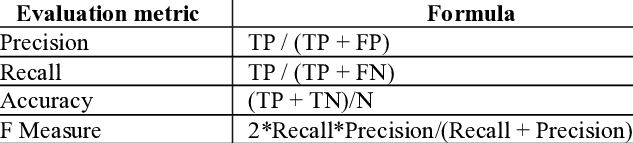

In [50]:
Image(filename='ClassificationMetrics.png') 

### Feature selection (отсечение ненужных признаков)

In [52]:
# clf_final = best_clf.best_params_['classifier']
# clf_final.fit(X_train, y_train)
# display(eli5.show_weights(clf_final))

Weight?,Feature
+2.724,x2
+1.933,<BIAS>
+1.171,x41
+1.054,x78
+1.006,x91
+0.921,x15
+0.908,x33
+0.825,x66
+0.755,x39
+0.733,x51


## Important feats

In [68]:
feat_imp = dict(zip(X.columns,clf_final.coef_.tolist()[0]))

In [71]:
feat_imp = {k: v for k, v in sorted(feat_imp.items(), key=lambda item: item[1])}

In [78]:
list(feat_imp.keys())[:10]+list(feat_imp.keys())[-10:]

['num_country_max_3days',
 'apple_max_30days',
 'num_title_ep_sum_14days',
 'dif_c_f_day',
 'top_8_sum_14days',
 'top_10_sum_3days',
 'num_country_max_30days',
 'num_title_ru_sum_3days',
 'top_10_sum_21days',
 'num_title_ru_max_7days',
 'apple_max_21days',
 'top_8_sum_7days',
 'num_title_ru_sum_7days',
 'num_country_max_14days',
 'apple_max_3days',
 'num_title_ru_max_3days',
 'num_country_max_21days',
 'top_10_sum_14days',
 'num_country_max_7days',
 'num_country_max_1days']

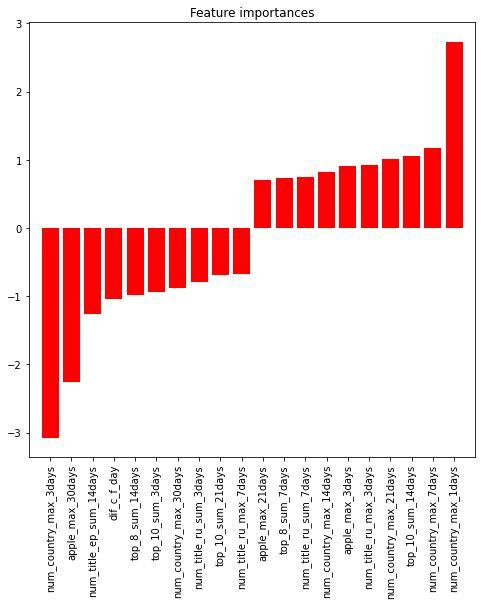

In [81]:
plt.figure(figsize=(8,8))
plt.title("Feature importances")
names_cols = list(feat_imp.keys())[:10]+list(feat_imp.keys())[-10:]
plt.bar(names_cols,
        list(feat_imp.values())[:10]+list(feat_imp.values())[-10:],
        color="r", align="center")
plt.xticks(rotation='vertical')
plt.xlim([-1, len(names_cols)])
plt.show()

In [94]:
more_imp_col = [c for c, v in feat_imp.items() if np.abs(v) > 0.1]

LogReg :
               precision    recall  f1-score   support

         0.0       0.83      0.62      0.71      4459
         1.0       0.37      0.63      0.46      1541

    accuracy                           0.62      6000
   macro avg       0.60      0.63      0.59      6000
weighted avg       0.71      0.62      0.65      6000




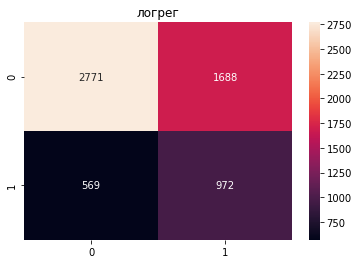

In [110]:
plot_conf_matrix(log_X[more_imp_col],y,best_clf.best_params_['classifier'],'логрег', print_score=True)